In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import scipy.signal as ss
from datetime import datetime

In [3]:
%matplotlib notebook

## Read data
Epoch is changed from datetime to timestamp and centered to the first time.

In [4]:
dd = pd.read_csv('../data/train.csv')
dd.epoch = pd.to_datetime(dd.epoch)
dd.epoch = dd.epoch.apply(datetime.timestamp)
dd.epoch = dd.epoch - np.min(dd.epoch)

## Fourier analysis
To compute the frequency sample we quit samples that are excessively near. After that we use 

Mean: 13792.65722165034, Std. Deviation: 0.0004153608223576846


/usr/local/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


<IPython.core.display.Javascript object>


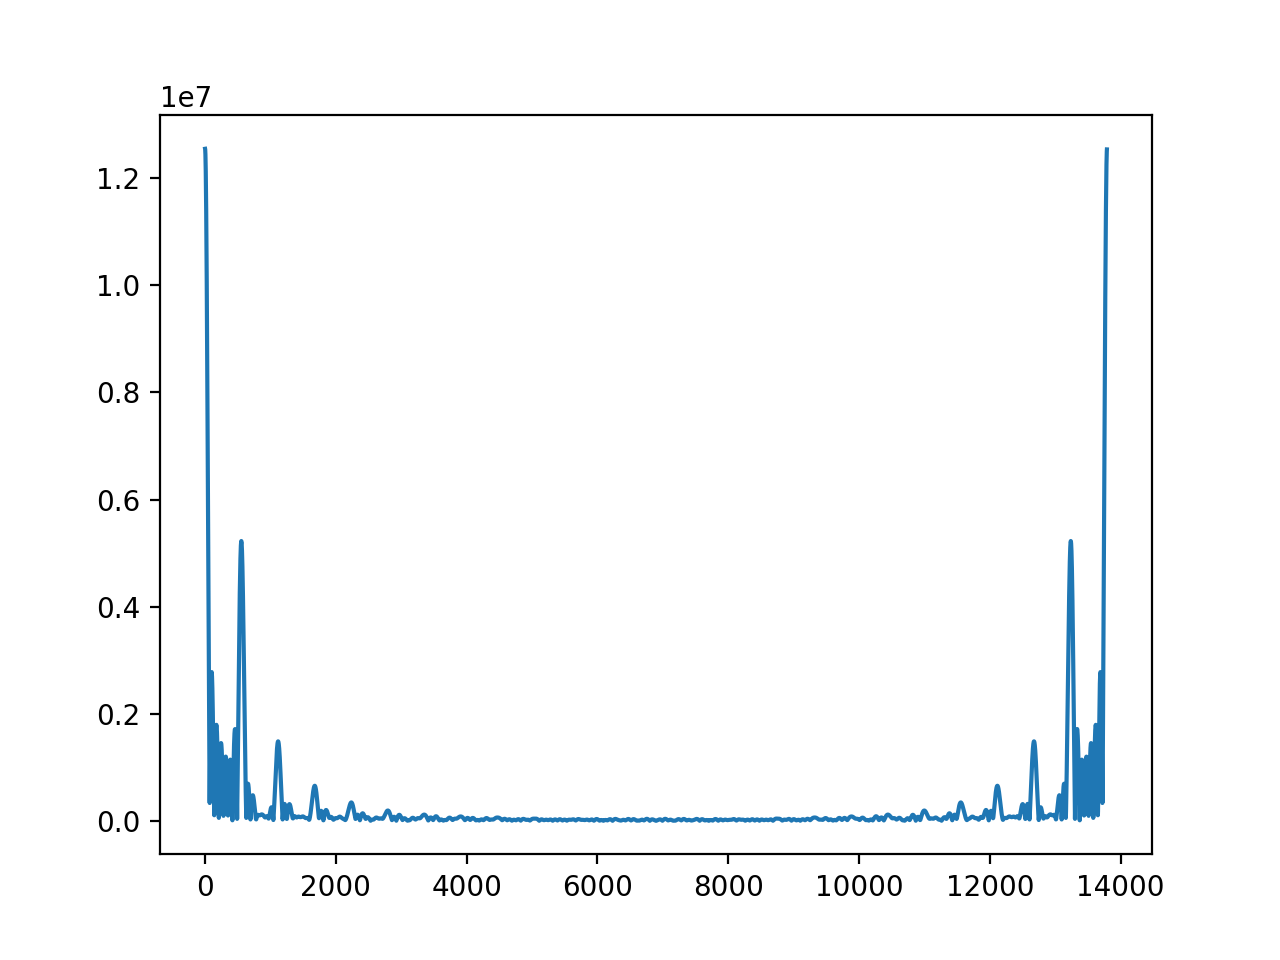

In [5]:
idx = 20
dd0 = dd[dd['sat_id']==idx]

time = []
first = True
for i in dd0.index:
    if not first:
        if (dd0.epoch[i]-dd0.epoch[i-1] > 0.01):
            time.append(dd0.epoch[i]-dd0.epoch[i-1])
    else:
        first = False
time = np.array(time)
print("Mean: {}, Std. Deviation: {}".format(np.mean(time), np.std(time)))
fs = np.mean(time)

N = 2**13
DD0x = fft(dd0.x, N)
plt.figure(0)
plt.plot(np.arange(N)/N*fs, abs(DD0x))

<IPython.core.display.Javascript object>


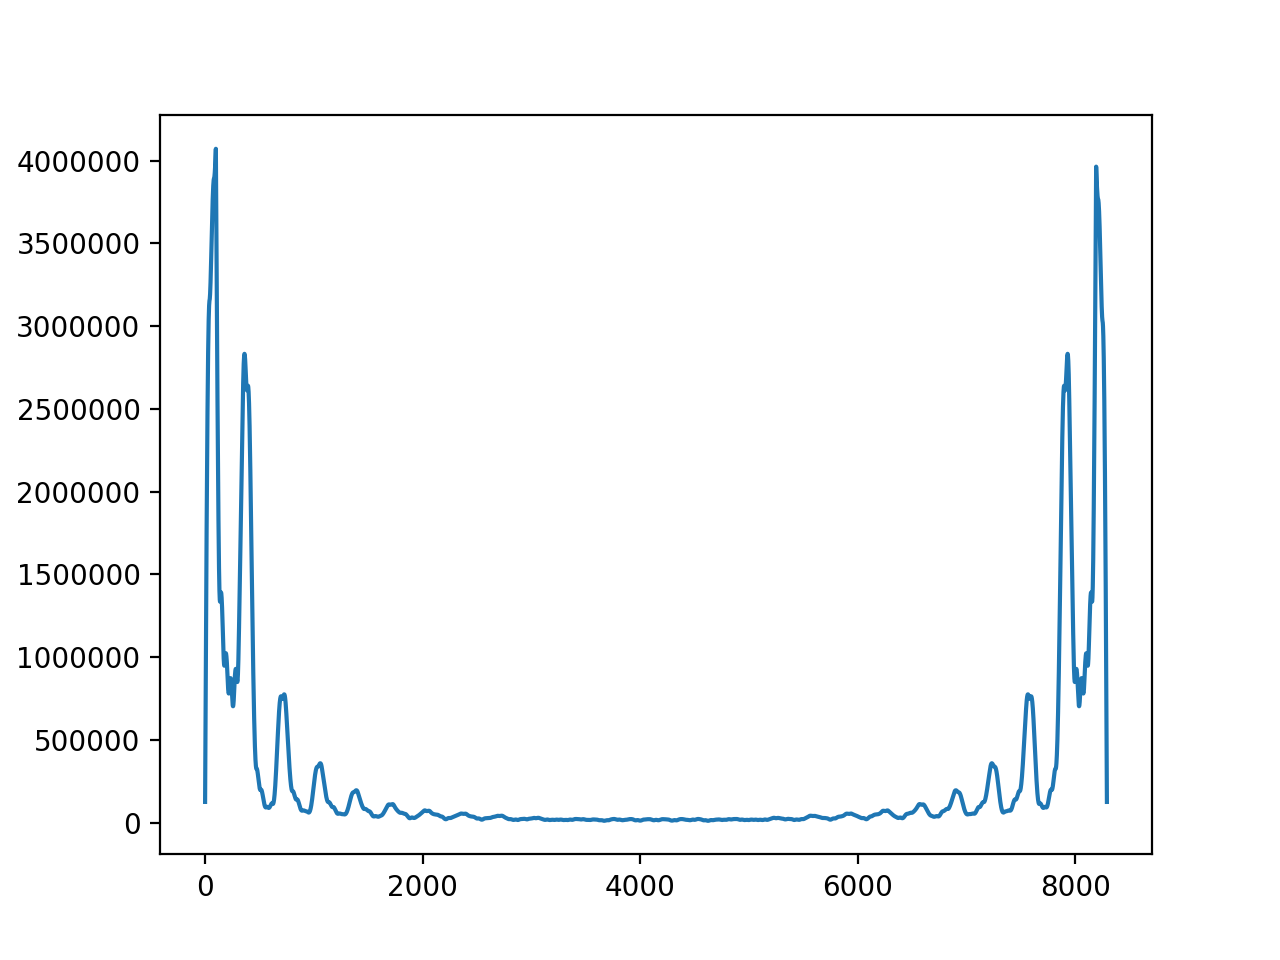

Mean: 322.75, sd: 37.11047695732298


In [66]:
n = 200
L = 100
v = np.convolve(abs(DD0x), np.ones(L)/L)
plt.figure(1)
plt.plot(v)
maxs = []
for i in range(len(v)//4):
    if i == 0:
        if v[i] > np.max(v[i+1:n]) :
            maxs.append(i)
    elif i < n:
        if v[i] > np.max(v[i+1:i+n]) and v[i] > np.max(v[:i]):
            maxs.append(i)
    elif v[i] > np.max(v[i-n:i]) and v[i] > np.max(v[i+1:i+n]):
        maxs.append(i)
    if len(maxs) == 5:
        break
max_diff = []
for i in range(1, len(maxs)):
    max_diff.append(maxs[i]-maxs[i-1])
max_diff = np.array(max_diff)
print("Mean: {}, sd: {}".format(np.mean(max_diff), np.std(max_diff)))

In [65]:
maxs

[49, 354, 687, 1019, 1351]

In [56]:
v[0]

313760.2267259522

In [57]:
v[1]

627225.0613289987